In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

FASHION MNIST DATA

In [ ]:
# Load Data

In [ ]:
mnist= tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


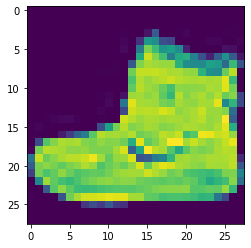

In [ ]:
plt.imshow(x_train[0])

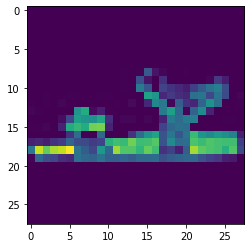

In [ ]:
plt.imshow(x_train[-1])

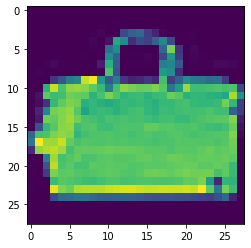

In [ ]:
plt.imshow(x_train[99])

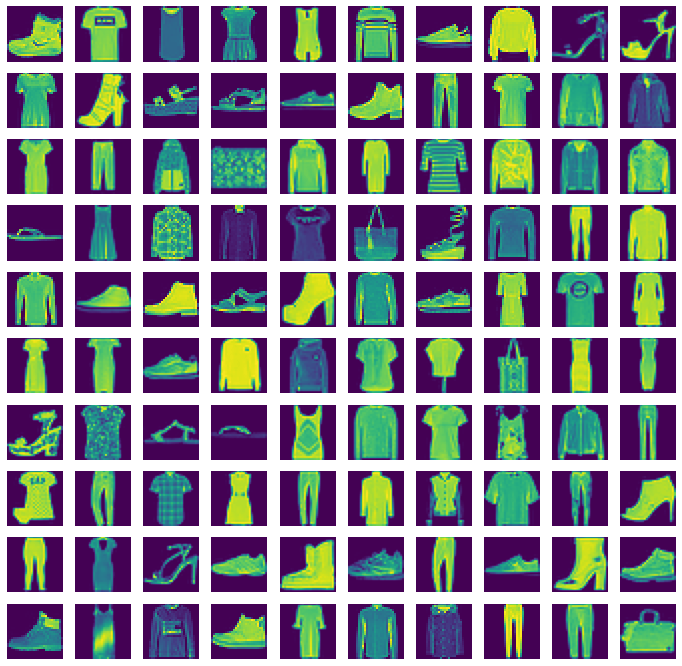

In [ ]:
plt.figure(figsize= (12, 12))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(x_train[i])

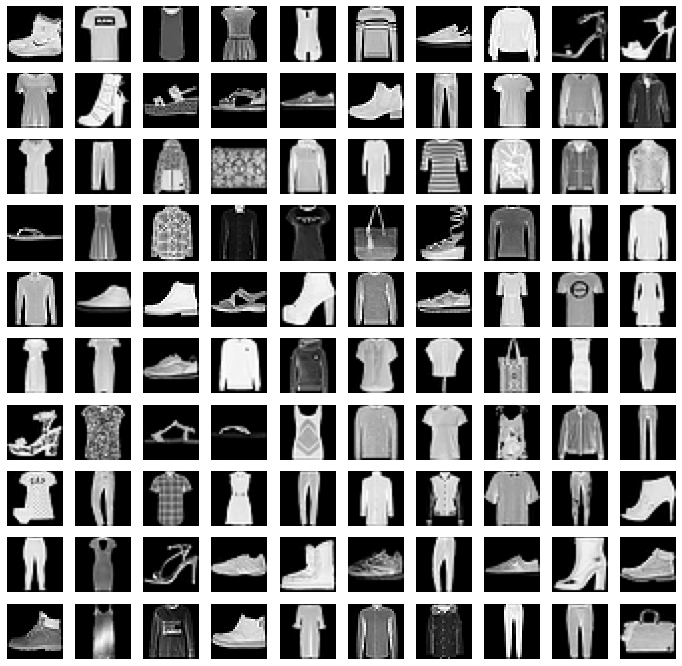

In [ ]:
plt.figure(figsize= (12, 12))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap= 'gray')

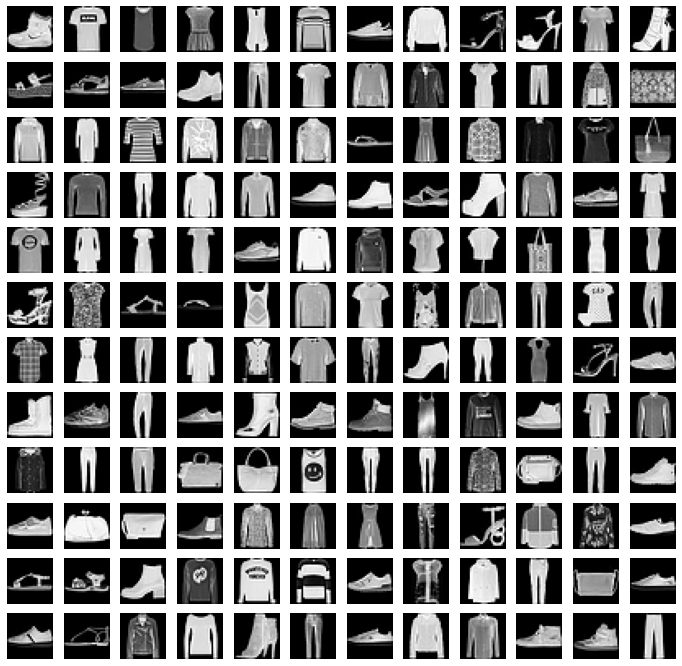

In [ ]:
plt.figure(figsize= (12, 12))
for i in range(144):
  plt.subplot(12, 12, i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap= 'gray')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


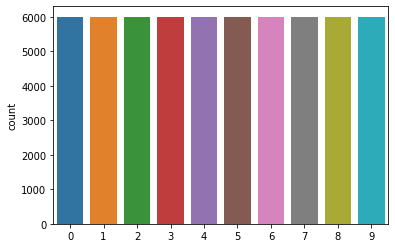

In [ ]:
# Checking if dataset is balanced or imbalanced

sns.countplot(y_train)

In [ ]:
# It seems like a balanced dataset since number of images of each type is similar

In [ ]:
# It will have to be INFORMED to the model that its a greyscale image by converting teh image from (28, 28) to (28,28,1)

In [ ]:
x_train= x_train.reshape([60000, 28,28,1])
x_test= x_test.reshape([10000, 28,28,1])

In [ ]:
# Using One Hot Encoder to convert y to dummy variables

In [ ]:
from keras.utils.np_utils import to_categorical

y_train= to_categorical(y_train, num_classes= 10)
y_test= to_categorical(y_test, num_classes= 10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
# Now dataset is in ideal format

# Now doing data augmentation. The images can be zoomed/ titled/ distorted/ left or right skewed. So this step lets us augment/ change the images as required using image data generator. It creates image batches and performs augmentation

In [ ]:
train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 10,
    zoom_range= 0.1,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
)

train_datagen.fit(x_train)

In [ ]:
val_datagen= ImageDataGenerator(rescale= 1./255)
val_datagen.fit(x_test)

In [ ]:
# Building the model - Adding layers

model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation= 'relu', input_shape= (28,28,1)),    ## First convel layer
                                   tf.keras.layers.MaxPooling2D(2,2),  ## Applying first pooling layer

                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),    ## Second convel layer. Relu is almost always used in hidden layers
                                   tf.keras.layers.MaxPooling2D(2,2),  ## Applying second pooling layer

                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),    ## Third convel layer. Focussing on minute details so features increased to 128
                                   tf.keras.layers.MaxPooling2D(2,2),  ## Applying second pooling layer

                                   ## Mapping features to output - Building fully conencted dense layer of ANN

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer= Adam(),
              loss= 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Start Training

In [ ]:
history= model.fit(
    train_datagen.flow(x_train, y_train, batch_size= 64),
    validation_data= val_datagen.flow(x_test, y_test),
    batch_size= 64,
    epochs= 20,
    verbose= 1,
)

Epoch 1/20
938/938 [==============================] - 52s 22ms/step - loss: 0.6380 - accuracy: 0.7603 - val_loss: 0.4281 - val_accuracy: 0.8416
Epoch 2/20
938/938 [==============================] - 19s 21ms/step - loss: 0.4377 - accuracy: 0.8343 - val_loss: 0.3783 - val_accuracy: 0.8600
Epoch 3/20
938/938 [==============================] - 19s 21ms/step - loss: 0.3800 - accuracy: 0.8568 - val_loss: 0.3314 - val_accuracy: 0.8756
Epoch 4/20
938/938 [==============================] - 20s 22ms/step - loss: 0.3499 - accuracy: 0.8677 - val_loss: 0.3175 - val_accuracy: 0.8832
Epoch 5/20
938/938 [==============================] - 20s 21ms/step - loss: 0.3273 - accuracy: 0.8768 - val_loss: 0.2904 - val_accuracy: 0.8931
Epoch 6/20
938/938 [==============================] - 20s 21ms/step - loss: 0.3121 - accuracy: 0.8832 - val_loss: 0.3022 - val_accuracy: 0.8902
Epoch 7/20
938/938 [==============================] - 19s 20ms/step - loss: 0.3019 - accuracy: 0.8859 - val_loss: 0.3119 - val_accuracy:

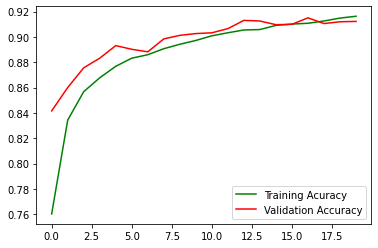

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()
plt.show()


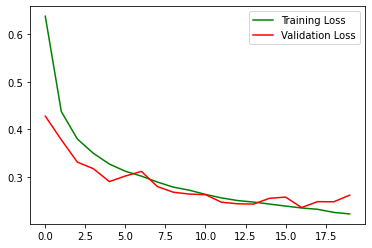

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()
plt.show()